In [1]:
!pip install openpyxl


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
dados = pd.read_excel("base_dados_treinamento.xlsx")

In [5]:
dados.head()

,Nome,Idade,Cidade,Salário,Área,Anos_de_Empresa
0,Ana,25.0,São Paulo,3500.0,Financeiro,2.0
1,Bruno,30.0,Rio de Janeiro,4200.0,TI,5.0
2,Carlos,28.0,Belo Horizonte,NaN,RH,3.0
3,Daniela,NaN,Curitiba,5000.0,Marketing,NaN
4,Eduardo,40.0,NaN,6000.0,TI,8.0


## **1.** **Limpeza de Dados**

Quantos valores nulos existem em cada coluna?

Preencha os valores nulos da coluna “Salário” com a média dos salários existentes.

Preencha os valores nulos da coluna “Cidade” com “Não informado”.

Remova todas as linhas em que o campo “Nome” está vazio.

Crie uma nova tabela apenas com os funcionários que têm todas as informações completas (sem nulos).

In [6]:
#verificando dados nulos
dados.isnull().sum()

Nome               1
Idade              2
Cidade             2
Salário            3
Área               1
Anos_de_Empresa    2
dtype: int64

In [7]:
#preenchendo os valores nulos da coluna "Salário"
salario_medio = dados["Salário"].mean()
dados["Salário"] = dados["Salário"].fillna(salario_medio)


In [8]:
#preenchendo os valores  nulos da coluna cidade
dados["Cidade"] = dados["Cidade"].fillna("Não informado")
dados["Cidade"] = dados["Cidade"].replace("Não informado","Não Informado")

In [9]:
#Visualizando o DataFrame 
dados.head()

,Nome,Idade,Cidade,Salário,Área,Anos_de_Empresa
0,Ana,25.0,São Paulo,3500.0,Financeiro,2.0
1,Bruno,30.0,Rio de Janeiro,4200.0,TI,5.0
2,Carlos,28.0,Belo Horizonte,4100.0,RH,3.0
3,Daniela,NaN,Curitiba,5000.0,Marketing,NaN
4,Eduardo,40.0,Não Informado,6000.0,TI,8.0


In [10]:
#Remova todas as linhas em que o campo “Nome” está vazio
dados.dropna(subset="Nome",inplace=True)

In [11]:
dados.head()

,Nome,Idade,Cidade,Salário,Área,Anos_de_Empresa
0,Ana,25.0,São Paulo,3500.0,Financeiro,2.0
1,Bruno,30.0,Rio de Janeiro,4200.0,TI,5.0
2,Carlos,28.0,Belo Horizonte,4100.0,RH,3.0
3,Daniela,NaN,Curitiba,5000.0,Marketing,NaN
4,Eduardo,40.0,Não Informado,6000.0,TI,8.0


In [12]:
#Criando uma nova tabela apenas com os funcionários que têm todas as informações completas (sem nulos)
dados_atualizado = dados.dropna().copy()

In [13]:
#Visualizando o DataFrame
dados_atualizado.head()


,Nome,Idade,Cidade,Salário,Área,Anos_de_Empresa
0,Ana,25.0,São Paulo,3500.0,Financeiro,2.0
1,Bruno,30.0,Rio de Janeiro,4200.0,TI,5.0
2,Carlos,28.0,Belo Horizonte,4100.0,RH,3.0
4,Eduardo,40.0,Não Informado,6000.0,TI,8.0
9,João,33.0,Recife,4100.0,TI,2.0


In [14]:
#Resetando o index
dados_atualizado.reset_index(drop=True, inplace=True)
dados_atualizado.head()

,Nome,Idade,Cidade,Salário,Área,Anos_de_Empresa
0,Ana,25.0,São Paulo,3500.0,Financeiro,2.0
1,Bruno,30.0,Rio de Janeiro,4200.0,TI,5.0
2,Carlos,28.0,Belo Horizonte,4100.0,RH,3.0
3,Eduardo,40.0,Não Informado,6000.0,TI,8.0
4,João,33.0,Recife,4100.0,TI,2.0


## **2.** **Análises Descritivas**

Qual é a idade média dos funcionários?

Qual é o maior e o menor salário?

Quantos funcionários trabalham em cada Área?

Qual é a média salarial por área?


In [15]:
#Verificando a idade média dos funcionários
media_idade = dados_atualizado["Idade"].mean()
print(int(media_idade))

31


In [16]:
#Verificando o Maior Salário
maior_salario = dados_atualizado["Salário"].max()
print(f"O maior salário é de: R${maior_salario}")

O maior salário é de: R$6000.0


In [17]:
#Verificando o Menor salário 
menor_salario = dados_atualizado["Salário"].min()
print(f"O menor salário é de: R${menor_salario}")

O menor salário é de: R$3500.0


In [18]:
# Quantidade de funcionário por área
quantidade_funcionario_area = dados_atualizado.groupby("Área")[["Nome"]].count()
quantidade_funcionario_area

,Nome
Área,
Financeiro,1
RH,1
TI,3


In [19]:
# Verificando a média salarial por área
media_salarial_area = dados_atualizado.groupby("Área")[["Salário"]].mean().round()
print(media_salarial_area)

            Salário
Área               
Financeiro   3500.0
RH           4100.0
TI           4767.0


## **3.** **Criação de Colunas**

Crie uma nova coluna chamada “Faixa Salarial”, com as categorias:

“Baixo” → até R$3.000

“Médio” → entre R$ 3.001 e R$ 5.000

“Alto” → acima de R$5.000

Crie uma coluna chamada “Tempo de Casa”:

“Novo” → até 2 anos

“Intermediário” → de 3 a 5 anos

“Antigo” → acima de 5 anos

Calcule o salário anual (Salário × 12).

In [20]:
dados_atualizado["Faixa Salarial"] =[
    "Baixo" if salario < 3.000 else
    "Médio" if salario <=5000 else
    "Alto"
    for salario in dados_atualizado["Salário"]]

In [21]:
dados_atualizado.head()

,Nome,Idade,Cidade,Salário,Área,Anos_de_Empresa,Faixa Salarial
0,Ana,25.0,São Paulo,3500.0,Financeiro,2.0,Médio
1,Bruno,30.0,Rio de Janeiro,4200.0,TI,5.0,Médio
2,Carlos,28.0,Belo Horizonte,4100.0,RH,3.0,Médio
3,Eduardo,40.0,Não Informado,6000.0,TI,8.0,Alto
4,João,33.0,Recife,4100.0,TI,2.0,Médio


In [22]:
dados_atualizado["Tempo de casa"] = [
    "Novo" if anos <= 2 else
    "Intermediário" if anos <= 5 else
    "Antigo"
    for anos in dados_atualizado["Anos_de_Empresa"]
]

In [23]:
dados_atualizado.head()

,Nome,Idade,Cidade,Salário,Área,Anos_de_Empresa,Faixa Salarial,Tempo de casa
0,Ana,25.0,São Paulo,3500.0,Financeiro,2.0,Médio,Novo
1,Bruno,30.0,Rio de Janeiro,4200.0,TI,5.0,Médio,Intermediário
2,Carlos,28.0,Belo Horizonte,4100.0,RH,3.0,Médio,Intermediário
3,Eduardo,40.0,Não Informado,6000.0,TI,8.0,Alto,Antigo
4,João,33.0,Recife,4100.0,TI,2.0,Médio,Novo


## **4.** **Criação de Gráficos**

Faça um gráfico de barras mostrando o número de funcionários por área.

Faça um gráfico de dispersão relacionando Idade × Salário.


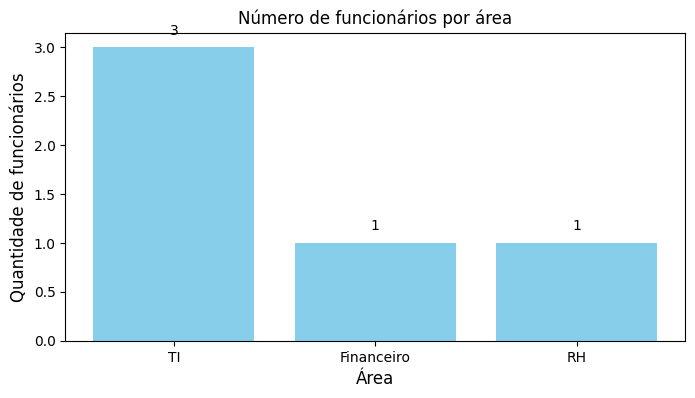

In [24]:
# Contando a quantidade de funcionários por área
quantidade_funcionario_area = dados_atualizado["Área"].value_counts()

quantidade_funcionario_area = quantidade_funcionario_area.astype(int)

# Criando o gráfico de barras
plt.figure(figsize=(8,4))
plt.bar(quantidade_funcionario_area.index, quantidade_funcionario_area.values, color="skyblue")
plt.title("Número de funcionários por área")
plt.xlabel("Área", fontsize=12)
plt.ylabel("Quantidade de funcionários",fontsize=12)

# Adicionando os valores no topo de cada barra
for i, v in enumerate(quantidade_funcionario_area.values):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.savefig("grafico_idade_salario.png", dpi=300, bbox_inches='tight')
    

plt.show()

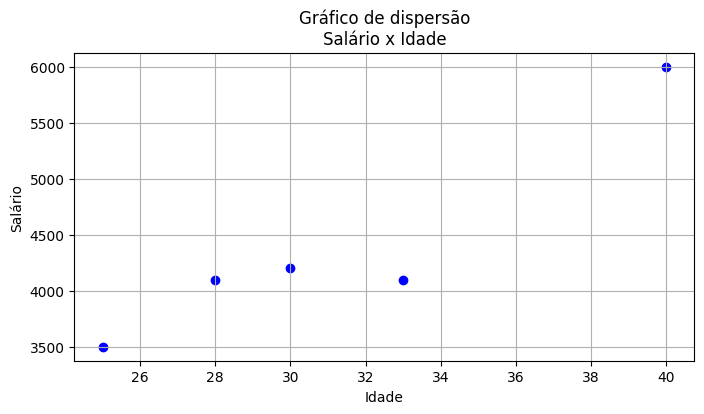

In [25]:
#criando um gráfico de dispersão relacionando Idade e Salário

plt.figure(figsize=(8,4))
plt.scatter(dados_atualizado["Idade"],dados_atualizado["Salário"], color= "blue")
plt.title("Gráfico de dispersão\nSalário x Idade",fontsize=12)
plt.xlabel("Idade",fontsize=10)
plt.ylabel("Salário",fontsize=10)
plt.grid()
plt.savefig("grafico_idade_salario.png", dpi=300, bbox_inches='tight')
plt.show()


In [26]:
#salvado o nosso dataframe atualizado
dados_atualizado.to_excel("dados_atualizados.xlsx",index=False)

## **5.** **Filtros e Consultas**

Filtre apenas os funcionários da área de TI.

Liste apenas os funcionários com salário acima da média geral.

Filtre os funcionários que têm mais de 3 anos de empresa e salário superior a R$4.000.


In [29]:
#Filtrando funcionários da área de TI
Funcionarios_ti = dados_atualizado.loc[dados_atualizado["Área"] == "TI",["Nome","Área"]]
Funcionarios_ti


,Nome,Área
1,Bruno,TI
3,Eduardo,TI
4,João,TI


In [33]:
#listando os funcionários com o salário acima da média
salário_maior_media = dados_atualizado.query("Salário>@salario_medio")
salário_maior_media

,Nome,Idade,Cidade,Salário,Área,Anos_de_Empresa,Faixa Salarial,Tempo de casa
1,Bruno,30.0,Rio de Janeiro,4200.0,TI,5.0,Médio,Intermediário
3,Eduardo,40.0,Não Informado,6000.0,TI,8.0,Alto,Antigo


In [35]:
#listando funcionários que têm mais de 3 anos de empresa e salário superior a R$4.000.

funcionarios_filtro2 = dados_atualizado.query("Anos_de_Empresa > 3 & Salário > 4.000")
funcionarios_filtro2

,Nome,Idade,Cidade,Salário,Área,Anos_de_Empresa,Faixa Salarial,Tempo de casa
1,Bruno,30.0,Rio de Janeiro,4200.0,TI,5.0,Médio,Intermediário
3,Eduardo,40.0,Não Informado,6000.0,TI,8.0,Alto,Antigo


### **Resumo Projeto**

Neste mini-projeto, foi realizada uma análise exploratória de dados de funcionários, com foco em idade, salário, área de atuação e tempo de empresa. Foram aplicadas técnicas de limpeza de dados, remoção de valores nulos e criação de novas colunas para classificação salarial e de tempo de casa.

Através dos gráficos e cálculos realizados, foi possível observar o comportamento das faixas salariais, identificar a média de idade dos colaboradores e compreender a distribuição de funcionários por área. O projeto demonstra habilidades em manipulação de dados com Pandas e visualização com Matplotlib, consolidando conhecimentos fundamentais para atuação como analista de dados júnior